# 합성곱 신경망(CNN)
* 시각 정보에서 -> 의미를 찾음
    - 사람 : 1, 2, 3, 4, 5 -> 전체 모양에서 인식
    - 기계 -> 픽셀(pixel)로 인식
    - 기계가 인식 오류가 나는 이유
        + 필체, 크기 -> 픽셀의 위치가 달라짐 => '위상(위치 + 상태)'이 달라짐

## conv 계층
* 입력데이터에 대한 특징을 추출

## RELU 계층
* 입력정보가 0보다 크면 그냥 내보내고, 0보다 작으면 0으로 내보냄

## POOLING
* 입력정보를 최대/최소/평균 등으로 압축하여 데이터의 연산량을 줄여줌
    - max pooling
    - min pooling
    - average pooling

# Convolution 연산
* 윈노트 이미지 참고(5.pdf)
* 참고 : http://taewan.kim/post/cnn/

In [2]:
# kernel 연산(Convolution 연산의 일종)
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

In [8]:
#!wget https://ww.namu.la/s/aeca2e14dbb78281beabffe6d5a8b1a84233da4aa2d7b857f11baa8530908b4faf2dae5ce55389c73821b2235cfa3c4d9744bb30d3edc6efda4a446164481c788feb115adb94ac6f1d4ff8e1713021d58ef5ae9f97046be3c0a05d975d21dc2430a5725afaf7283abc18bd6b249a7384
orig = Image.open("./test.jpg")

In [9]:
kerneledge = [
               -1, -1, -1,
               -1, 8, -1,
               -1, -1, -1
]
# 값(필터값,kernel값)을 바꿔보자

In [10]:
convol = orig.filter(ImageFilter.Kernel((3,3), kerneledge, 1,0))

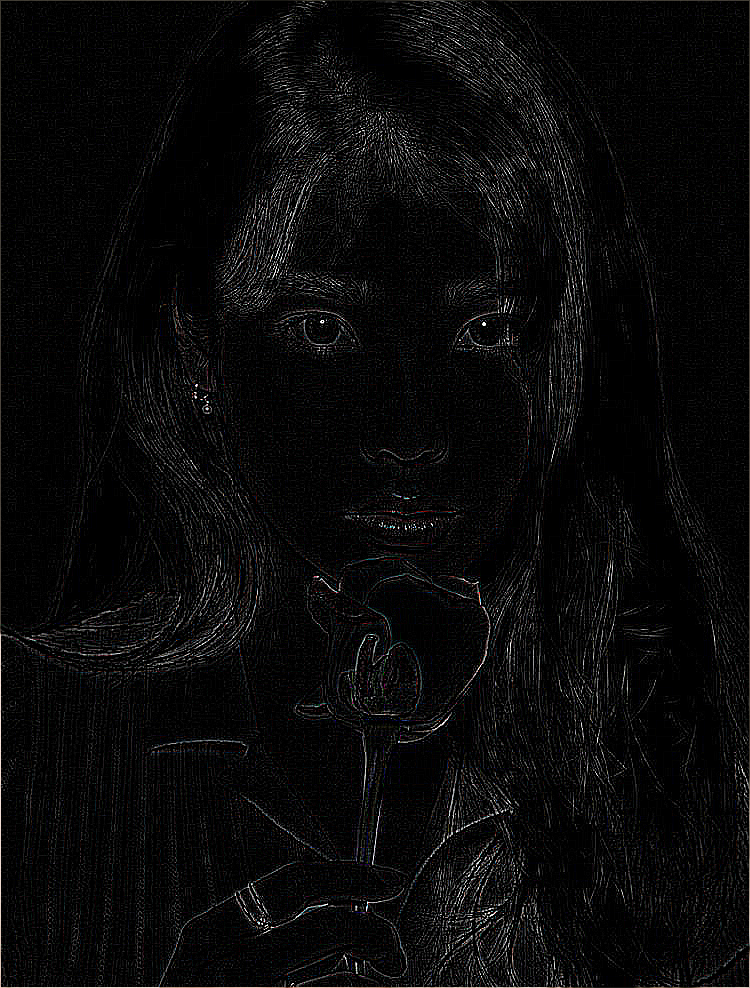

In [11]:
display(convol)

### 1D Convolution
* D : dimension  

$y_0 = w_0*x_0 + w_1*x_1 + w_2*x_2 + b_1$ 

$y_1 = w_0*x_1 + w_1*x_2 + w_2*x_3 + b_1$  
...  
$y_{N-3} = w_0*x_{N-3} + w_1*x_{N-2} + w_2*x_{N-1} + b_1$

### 2D Convolution
* 보통 컬러는 red, green, blue 이미지를 사용(채널 3개)
* 각각의 채널을 Convolution 한 후(특징을 추출), 더함 -> 하나의 feature map 출력

## convolution 계층별 역할
* input data * kernel -> feature 추출 -> feature map -> feature map의 pooling 계층 통과 -> 이미지 축소 -> input data로 반복
    - 위의 과정 반복
* 예) Image -> conv -> Relu(마이너스 값을 없애기 위해 사용) -> pooling -> conv -> Relu -> pooling -> ... -> flatten(ANN) -> Softmax -> 분류

* 예) 원노트 이미지 참고(5.pdf)

## 개인 정리
* CNN의 학습은 결국 필터값(가중치)의 최적의 값을 찾는 것이다.